## Time series forecasing in Tensorflow

### Thao tác trên file EURUSD.csv để tạo ra file mới là EURUSD_new.csv


In [54]:
import pandas as pd
df = pd.read_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD.csv")

df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
1,2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2,2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
3,2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0.0
4,2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0.0


## Các thao tác phân tích, xử lý và trực quan dữ liệu 

In [55]:
# Đổi cột Date sang Index
df.Date = pd.to_datetime(df.Date, dayfirst = False) 
df.set_index("Date", inplace = True)

df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0.0
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0.0


In [57]:
eurusd_prices = pd.DataFrame(df["Open"]).rename(columns={"Open": "Price"})

eurusd_prices.head(5)

,Price
Date,
2004-01-01,1.259002
2004-01-02,1.258194
2004-01-05,1.263903
2004-01-06,1.268907
2004-01-07,1.272394


In [59]:
from datetime import date
d0 = date(2022, 10, 14)
d1 = date(2004, 1, 1)
delta = abs(d0 - d1)

print("Số ngày từ 1/1/2004 -> 14/10/2022     : " + str(delta.days + 1) + " ngày")

print("")

print("Dữ liệu có trong dữ liệu hiện tại gồm : " + str(len(df)) + " ngày (Đã bao gồm giá trị Null)")

print("")

print("Dữ liệu thiếu                         : " + str(delta.days + 1- len(df)) + " ngày")

Số ngày từ 1/1/2004 -> 14/10/2022     : 6862 ngày

Dữ liệu có trong dữ liệu hiện tại gồm : 4902 ngày (Đã bao gồm giá trị Null)

Dữ liệu chứa giá trị Null là          : 29 ngày

Dữ liệu thiếu                         : 1960 ngày


In [67]:
time_sdata = pd.date_range("01/01/2004", periods=6862, freq="D") # 6862 là số ngày tính từ 1/1/2004 -> 14/10/2022 
data = pd.DataFrame(index=time_sdata)
data["Date"] = time_sdata 
data.set_index("Date", inplace = True)

In [74]:
import numpy as np 
# Khởi tạo các cột mới trong data 
data["Open"] = [np.NaN]*len(data)
data["High"] = [np.NaN]*len(data)
data["Low"] = [np.NaN]*len(data)
data["Close"] = [np.NaN]*len(data)
data["Adj Close"] = [np.NaN]*len(data)
data["Volume"] = [np.NaN]*len(data)

In [76]:
# Chuyển dữ liệu từ df sang data (Các dữ liệu k có ở df thì tương ứng ở data sẽ là NaN)
for i in range(len(df)):
    for j in range(i, len(data)):
        if df.index[i] == data.index[j]:
            data[:][j:j+1] = df[:][i:i+1]
            break 
        
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2004-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
...,...,...,...,...,...,...
2022-10-10,0.973501,0.975229,0.968251,0.973501,0.973501,0.0
2022-10-11,0.971006,0.975810,0.967399,0.971006,0.971006,0.0
2022-10-12,0.970017,0.973302,0.966968,0.970017,0.970017,0.0


In [78]:
# Lưu lại dữ liệu mới  
data.to_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD_new.csv")

### Thao tác trên file EURUSD_new.csv, Dữ liệu thao tác lưu vào biến data

In [83]:
data.isnull().sum()

Open         1989
High         1989
Low          1989
Close        1989
Adj Close    1989
Volume       1989
dtype: int64

In [87]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.0
mean,1.247379,1.252041,1.242237,1.247391,1.247391,0.0
std,0.123631,0.124361,0.124143,0.123624,0.123624,0.0
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0
25%,1.137139,1.140901,1.133800,1.137139,1.137139,0.0
50%,1.236598,1.240325,1.230300,1.236308,1.236308,0.0
75%,1.336095,1.340986,1.331079,1.336112,1.336112,0.0
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0


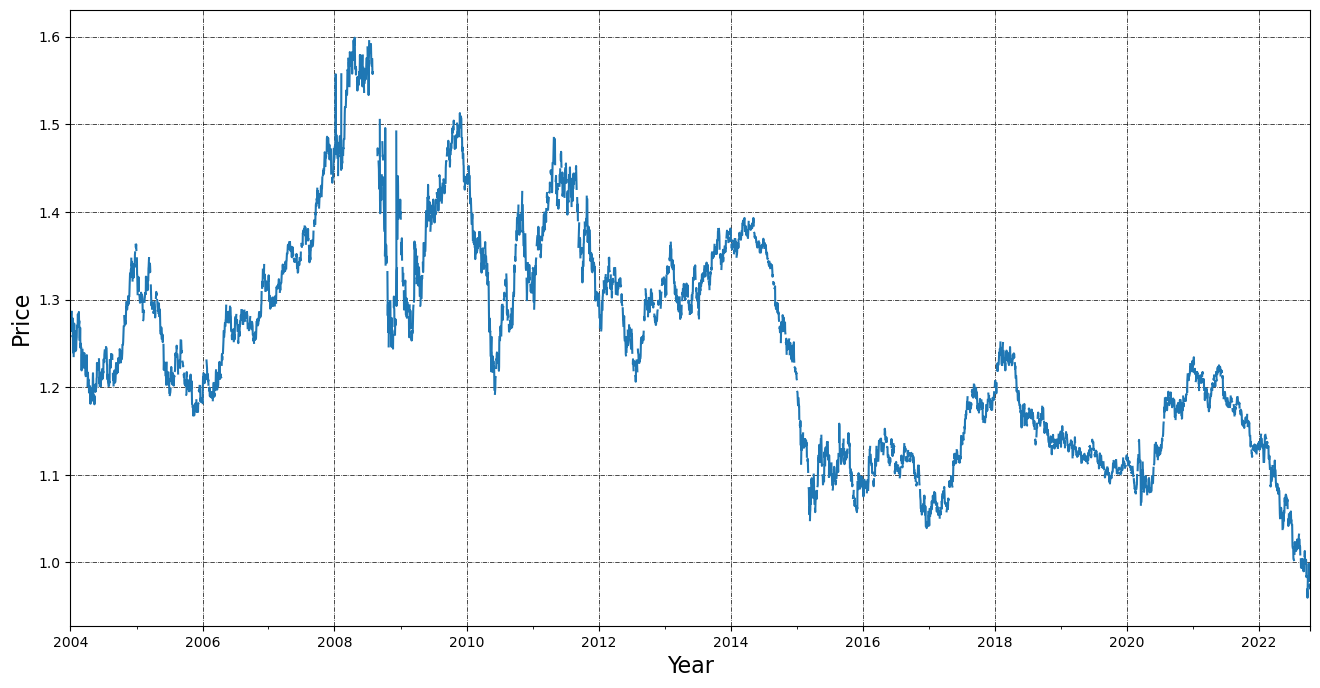

In [86]:
# Trực quan cột Close trong data 
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

data['Close'].plot(figsize=(16, 8))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

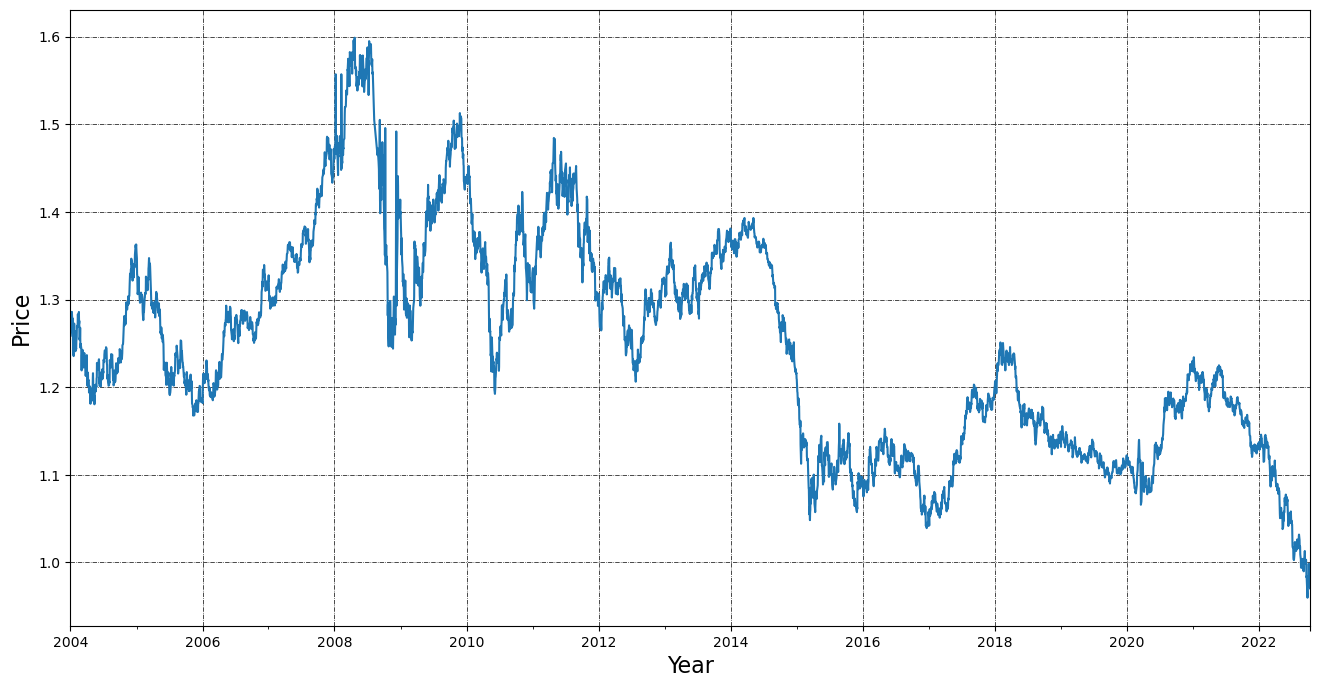

In [91]:
# Điền khuyết 
data = data.interpolate()

data['Close'].plot(figsize=(16, 8))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

In [88]:
eurusd_prices1 = pd.DataFrame(data["Open"]).rename(columns={"Open": "Price"})

eurusd_prices1.head(5)

,Price
Date,
2004-01-01,1.259002
2004-01-02,1.258194
2004-01-03,NaN
2004-01-04,NaN
2004-01-05,1.263903


In [ ]:
eurusd_prices1 = eurusd_prices1.interpolate()

eurusd_prices1.isnull().sum()

Price    0
dtype: int64

In [ ]:
eurusd_prices.isnull().sum()

Price    29
dtype: int64